In [20]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

Populating the interactive namespace from numpy and matplotlib


In [21]:
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.csv',
                index_col=0)

In [22]:
df.head()

,classI,classII,Tissue,Age,Race,homozygous_classI,homozygous_classII,homozygous_total
TCGA-02-0003,0.169941,0.494106,GBM,50.0,WHITE,0.0,1.0,1.0
TCGA-02-0033,0.184676,0.487230,GBM,54.0,WHITE,0.0,2.0,2.0
TCGA-02-0047,0.120825,0.472495,GBM,78.0,WHITE,2.0,1.0,3.0
TCGA-02-0055,0.152259,0.496071,GBM,62.0,WHITE,0.0,2.0,2.0
TCGA-02-2466,0.181729,0.414538,GBM,61.0,WHITE,0.0,1.0,1.0


In [23]:
hpv_neg = [x[:12] for x in open('/cellar/users/ramarty/Data/hla_ii/clinical/HPVneg.txt').readlines()[1:]]

In [24]:
df_hnsc = df[df.Tissue == 'HNSC']

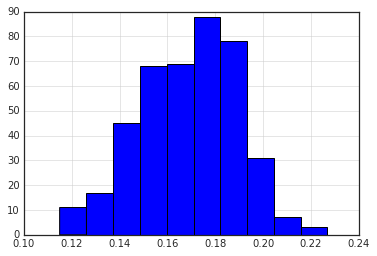

In [25]:
df_hnsc.ix[hpv_neg].classI.hist()

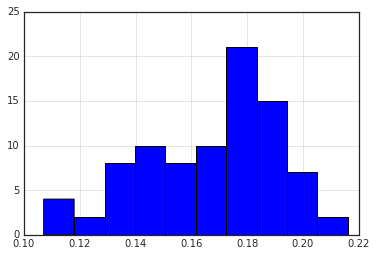

In [26]:
df_hnsc.ix[[x for x in df_hnsc.index if x not in hpv_neg]].classI.hist()

In [27]:
print df_hnsc.ix[hpv_neg].classI.mean()
print df_hnsc.ix[[x for x in df_hnsc.index if x not in hpv_neg]].classI.mean()

0.168650148643
0.167468328704


In [28]:
sp.mannwhitneyu(df_hnsc.ix[hpv_neg].classI, 
                df_hnsc.ix[[x for x in df_hnsc.index if x not in hpv_neg]].classI)

MannwhitneyuResult(statistic=18555.0, pvalue=0.37498547684397665)

In [29]:
df.Tissue.unique()

array(['GBM', 'OV', 'LUAD', 'LUSC', 'PRAD', 'BLCA', 'TGCT', 'PAAD', 'KIRP',
       'LIHC', 'SARC', 'MESO', 'COAD', 'STAD', 'SKCM', 'KIRC', 'THCA',
       'HNSC', 'BRCA', 'UCEC', 'LAML', nan, 'READ', 'CESC', 'LGG', 'DLBC',
       'KICH', 'UCS', 'ACC', 'PCPG', 'UVM'], dtype=object)

In [30]:
df[df.Tissue == 'CESC'].classI.mean()

0.17153063046967273

In [32]:
df[df.Tissue != 'CESC'].classI.mean()

0.16806715625971411

In [33]:
sp.mannwhitneyu(df[df.Tissue == 'CESC'].classI,
                df[df.Tissue != 'CESC'].classI)

MannwhitneyuResult(statistic=234311.5, pvalue=0.18283003958140132)